In [1]:
import pandas as pd
import numpy as np
import tensorflow

np.random.seed(2)
tensorflow.set_random_seed(2)

In [2]:
df = pd.read_csv('/content/rileyPlays.csv')
df

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained,year,play_type
0,True,-4,True,1,3157,1357,3,3,4,3,20,2018,FG
1,True,3,True,1,3423,1623,3,3,4,3,20,2015,FG
2,True,3,True,2,2617,817,4,4,4,4,21,2018,FG
3,True,21,False,4,278,278,4,4,4,4,22,2016,FG
4,True,44,False,4,777,777,5,5,4,5,22,2018,FG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,False,-21,False,3,1540,1540,13,13,1,10,4,2018,Rush
10312,False,-18,False,4,595,595,12,12,1,10,1,2018,Rush
10313,False,-21,False,2,2280,480,10,10,2,6,1,2018,Rush
10314,False,-11,False,4,263,263,8,8,1,8,8,2018,Rush


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python **super important for encoding function**

In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:11]
y = df.iloc[:,12]

X = X.replace({True:1, False:0})
X

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
0,1,-4,1,1,3157,1357,3,3,4,3,20
1,1,3,1,1,3423,1623,3,3,4,3,20
2,1,3,1,2,2617,817,4,4,4,4,21
3,1,21,0,4,278,278,4,4,4,4,22
4,1,44,0,4,777,777,5,5,4,5,22
...,...,...,...,...,...,...,...,...,...,...,...
10311,0,-21,0,3,1540,1540,13,13,1,10,4
10312,0,-18,0,4,595,595,12,12,1,10,1
10313,0,-21,0,2,2280,480,10,10,2,6,1
10314,0,-11,0,4,263,263,8,8,1,8,8


In [4]:
def oheAndReplace(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

y = y.to_frame()
y = oheAndReplace(y, 'play_type')
#y = y.replace({'Rush':0, 'Pass':1})
y

,play_type_FG,play_type_Pass,play_type_Punt,play_type_Rush
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
10311,0,0,0,1
10312,0,0,0,1
10313,0,0,0,1
10314,0,0,0,1


In [0]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.15)
X_validation, X_test, y_validation, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining', 'secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_train.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_train = scaled_features
X_train

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
2877,0,1.104117,0,-0.426306,0.198838,-1.236035,0.542770,0.612597,1.159575,0.118060,-1.690546
10133,0,-0.967591,0,0.458602,-0.679304,0.401651,1.158036,0.288996,-0.921939,0.363241,-0.550857
9112,0,-2.521371,0,0.458602,-0.391999,0.961814,1.542578,0.086745,-0.921939,0.363241,-0.463189
10008,0,-3.686707,0,1.343509,-1.672941,-1.535657,-0.918487,1.381149,1.159575,1.098784,-0.550857
2922,0,-0.255441,1,-1.311213,1.321332,0.952509,-1.379937,-1.531259,1.159575,0.608422,-0.550857
...,...,...,...,...,...,...,...,...,...,...,...
1099,1,0.391967,0,-0.426306,0.676089,-0.305531,0.004412,0.895748,-0.921939,0.363241,-0.638526
2514,1,0.197745,1,-1.311213,0.897533,0.126222,-0.072496,0.936198,1.159575,-0.372301,0.150490
6637,1,-1.420777,0,0.458602,-0.873068,0.023867,0.927311,0.410346,0.118818,-0.862663,-0.375520
2575,1,0.197745,1,-1.311213,0.917578,0.165303,-0.303221,1.057548,0.118818,0.363241,-0.375520


Repeat for the validation data.

In [7]:
ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining','secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_validation.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_validation = scaled_features
X_validation

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
1353,1,0.185453,1,-0.452665,0.268891,-1.162613,-1.593743,1.721840,0.140693,-0.323183,1.379298
1246,1,-0.299013,1,-1.319898,1.561537,1.411520,-0.683872,1.237440,0.140693,0.452857,0.712844
1351,1,0.669919,0,-0.452665,0.450364,-0.801233,-1.442098,1.641106,-0.937489,0.452857,0.962764
8064,1,0.739128,0,0.414569,-0.225274,1.189132,-0.228937,0.995241,0.140693,-1.357902,-0.703372
9947,0,0.462290,0,0.414569,-0.099639,1.439318,0.225998,0.753041,-0.937489,0.452857,-0.120224
...,...,...,...,...,...,...,...,...,...,...,...
7199,1,0.254662,0,-0.452665,0.302394,-1.095896,-1.517921,1.681473,-0.937489,0.452857,-0.453452
4867,0,-3.482647,0,1.281803,-1.208020,-0.767875,1.211691,0.228275,-0.937489,0.452857,-0.620065
4311,0,-1.960039,0,0.414569,-0.798542,0.047545,-0.001469,0.874141,-0.937489,0.452857,0.129696
7716,1,0.185453,1,-1.319898,1.459167,1.207665,1.211691,-0.175391,-0.937489,0.452857,-0.286838


Repeat for test data.

In [8]:
ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining', 'secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_test.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_test = scaled_features
X_test

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
2917,0,-0.082061,1,-1.324999,1.236766,0.752574,-0.704411,-1.115609,-0.930090,0.432679,-0.211682
617,1,0.180942,1,-0.448461,0.354305,-0.966735,1.100436,-0.164464,-0.930090,0.432679,-0.362688
860,1,2.482213,0,1.304614,-1.493259,-1.235087,1.025234,0.430002,1.129680,-1.373372,-0.211682
3899,0,1.101450,0,0.428076,-0.407519,0.880273,1.401244,0.231847,0.099795,-0.083336,0.090331
7231,1,0.641196,0,0.428076,-0.424617,0.846960,-1.907643,1.975614,-0.930090,0.432679,-0.513695
...,...,...,...,...,...,...,...,...,...,...,...
7496,1,-0.279313,1,-1.324999,0.941345,0.177003,-0.328401,-0.917454,0.099795,0.174672,-0.211682
37,1,0.443944,0,1.304614,-1.560703,-1.366488,-0.478805,-0.996716,2.159564,0.174672,2.355425
3128,0,-1.002570,0,-0.448461,0.293511,-1.085180,1.175638,-0.124833,-0.930090,0.432679,-0.589198
4723,0,2.876717,0,1.304614,-1.204489,-0.672472,0.348416,-0.560774,0.099795,-0.857358,0.543350


In [9]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(22, activation='relu', input_dim=11))
model.add(layers.Dense(22,activation='relu'))
model.add(layers.Dense(22,activation='relu'))
model.add(layers.Dense(22,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=80, validation_data=(X_validation, y_validation))

Train on 8768 samples, validate on 774 samples
Epoch 1/80
8768/8768 [==============================] - 1s 115us/sample - loss: 0.9152 - acc: 0.5113 - val_loss: 0.7231 - val_acc: 0.6163
Epoch 2/80
8768/8768 [==============================] - 1s 80us/sample - loss: 0.7238 - acc: 0.5968 - val_loss: 0.6560 - val_acc: 0.6357
Epoch 3/80
8768/8768 [==============================] - 1s 79us/sample - loss: 0.6726 - acc: 0.6159 - val_loss: 0.6423 - val_acc: 0.6512
Epoch 4/80
8768/8768 [==============================] - 1s 76us/sample - loss: 0.6616 - acc: 0.6309 - val_loss: 0.6315 - val_acc: 0.6576
Epoch 5/80
8768/8768 [==============================] - 1s 73us/sample - loss: 0.6513 - acc: 0.6275 - val_loss: 0.6320 - val_acc: 0.6576
Epoch 6/80
8768/8768 [==============================] - 1s 75us/sample - loss: 0.6392 - acc: 0.6371 - val_loss: 0.6264 - val_acc: 0.6602
Epoch 7/80
8768/8768 [==============================] - 1s 76us/sample - loss: 0.6360 - acc: 0.6412 - val_loss: 0.6244 - val_acc: 

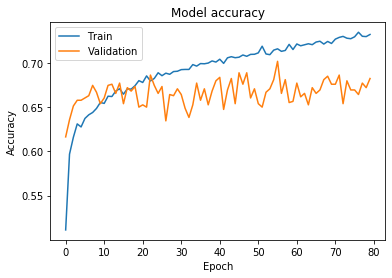

In [11]:
import matplotlib.pyplot as plt

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

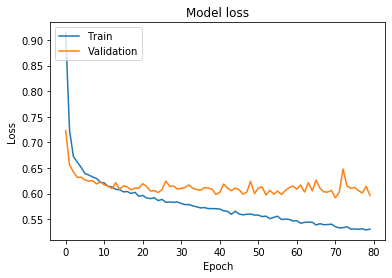

In [12]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
model.evaluate(X_test, y_test)

774/774 [==============================] - 0s 51us/sample - loss: 0.5841 - acc: 0.7196


[0.5841132760509964, 0.7196382]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                264       
_________________________________________________________________
dense_1 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_2 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_3 (Dense)              (None, 22)                506       
_________________________________________________________________
dropout (Dropout)            (None, 22)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 92        
Total params: 1,874
Trainable params: 1,874
Non-trainable params: 0
______________________________________________________

In [0]:
#model.save('coachingModel7093.h5')